In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1778s 10us/step


In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
model = tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
#1 layer


In [8]:
# 2nd Layer -- convolutional layer with 64 filters (3*3)
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [9]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#LAST LAYER

In [11]:
model.add(tf.keras.layers.Flatten())              #convert 2D feature map into 1D
model.add(tf.keras.layers.Dense(64, activation='relu')) #fully connected layer with 64 neurons
model.add(tf.keras.layers.Dense(10))                 #10 neurons for each class

In [19]:
# Build the model by calling it on a batch of data
model(tf.zeros_like(train_images[:1]))

%pip install pydot

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Note: you may need to restart the kernel to use updated packages.
You must install pydot (`pip install pydot`) for `plot_model` to work.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history= model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3459 - loss: 1.7727 - val_accuracy: 0.5555 - val_loss: 1.2611
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5735 - loss: 1.1911 - val_accuracy: 0.5868 - val_loss: 1.1624
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6384 - loss: 1.0208 - val_accuracy: 0.6582 - val_loss: 0.9721
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6798 - loss: 0.9048 - val_accuracy: 0.6745 - val_loss: 0.9447
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7116 - loss: 0.8192 - val_accuracy: 0.6850 - val_loss: 0.9068
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7348 - loss: 0.7560 - val_accuracy: 0.6946 - val_loss: 0.8939
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7487 - loss: 0.7059 - val_accuracy: 0.7000 - val_loss: 0.8642
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7624 -

In [20]:
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose= 1)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7068 - loss: 0.8919
Test accuracy: 0.7027000188827515
Test loss: 0.9089949131011963


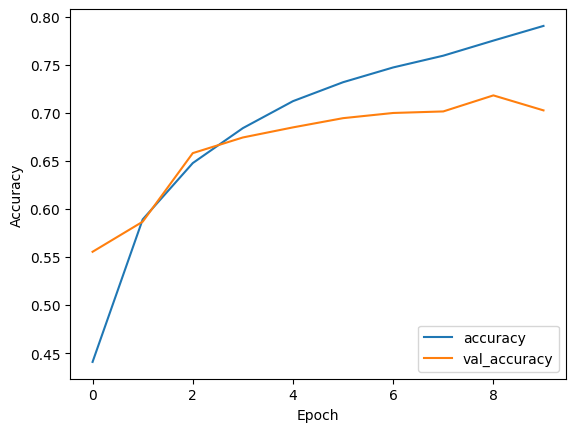

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
history.history['accuracy']